In [1]:
#SCRIPT TO CREATE THE AUTOMATION FUNCTION
from tools import *

In [2]:
csv =pd.read_csv(r"C:\Users\cjang.WILDCAT\Desktop\eis\test", names = ['name', 'recal_indices', 'mask_choice'],index_col = 0, sep = " ", header = None)

In [3]:
csv.iloc[1].recal_indices = '[1]'
csv.iloc[1]

recal_indices    [1]
mask_choice       1;
Name: DE_49_5_30.mpt, dtype: object

In [4]:
mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[1].name])

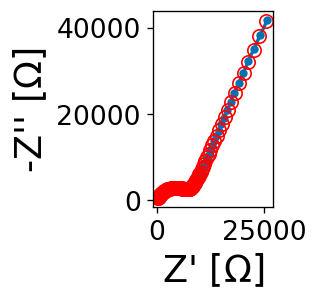

file      fit_Rs       fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_104_10_30.mpt  139.226658  7334.415954  0.764796      NaN  1.223252e-08   

          fit_R2    fit_n2  fit_fs2    fit_Q2        fit_Q3    fit_n3  
0  128375.575416  0.527175      NaN  0.000026  3.982860e-07  0.752281  


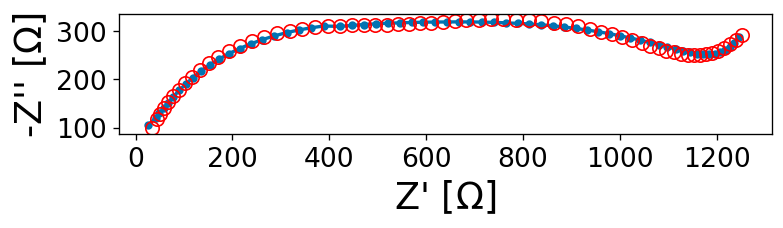

file    fit_Rs     fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_49_5_30.mpt  0.026685  466.18012  0.908774      NaN  8.046745e-09   

       fit_R2    fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  704.617023  0.773242      NaN  2.408007e-07  0.000012  0.692744  


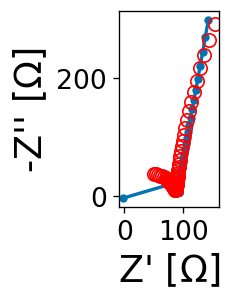

file    fit_Rs     fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_40_8_60.mpt -0.001684  87.185443  0.916218      NaN  7.868733e-09   

       fit_R2    fit_n2  fit_fs2    fit_Q2    fit_Q3    fit_n3  
0  193.736158  0.998927      NaN  0.000003  0.000002  0.922757  


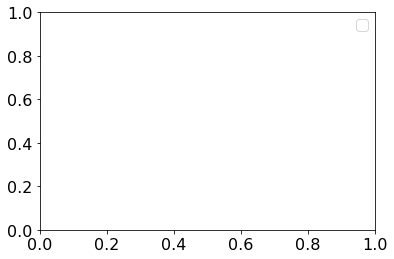

In [5]:
#AUTO FUNCTION
import logging
logging.getLogger().setLevel(logging.CRITICAL)
import math
for i in range(len(csv)):
    mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name])
    #print(mpt.data)
    if len((csv.iloc[i].mask_choice.strip('[')).strip('];')) == 1:
        mask_choice = mpt.fast_mask()
        masked_mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
        #print(len(masked_mpt.df[0]))
        if (csv.iloc[i].mask_choice.strip('[')).strip('];') == "1":
            if type((csv.iloc[i].recal_indices)) == str:
                #print(csv.iloc[i].recal_indices)
                pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                edited_inds = [int(i) for i in pre_inds]
                #print(edited_inds)
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:      
                        if ind in masked_mpt.df[0].index:  
                            masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                        else:
                            continue
                #print(len(masked_mpt.df[0]))
            else:
                #print('guessing...')
                continue
            print(masked_mpt.guesser())
        elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "2":
            mask_choice = mpt.masker0()
            masked_mpt = mpt_data(path =  r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
            if type((csv.iloc[i].recal_indices)) == str:
                #print(csv.iloc[i].recal_indices)
                pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                edited_inds = [int(i) for i in pre_inds]
                #print(edited_inds)
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:      
                        if ind in masked_mpt.df[0].index:  
                            masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                        else:
                            continue
                #print(len(masked_mpt.df[0]))
            else:
                #print('guessing...')
                continue
            print(masked_mpt.guesser())
        elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "3":
            mask_choice = mpt.masker()
            masked_mpt = mpt_data(path =  r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
            if type((csv.iloc[i].recal_indices)) == str:
                #print(csv.iloc[i].recal_indices)
                pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                edited_inds = [int(i) for i in pre_inds]
                #print(edited_inds)
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:      
                        if ind in masked_mpt.df[0].index:  
                            masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                        else:
                            continue
                #print(len(masked_mpt.df[0]))
            else:
                #print('guessing...')
                continue
            print(masked_mpt.guesser())
        elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "4":
            if type((csv.iloc[i].recal_indices)) == str:
                #print(csv.iloc[i].recal_indices)
                pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                edited_inds = [int(i) for i in pre_inds]
                #print(edited_inds)
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:      
                        if ind in masked_mpt.df[0].index:  
                            mpt.df[0] = mpt.df[0].drop(ind,axis=0)
                        else:
                            continue
                #print(len(masked_mpt.df[0]))
            else:
                #print('guessing...')
                continue
            print(mpt.guesser())
            print('here')
        else:
            print('bad masking choice')
    else:
        #print([float(i) for i in (csv.iloc[i].mask_choice.strip('[')).strip('];').split(',')])
        raw_window = [float(i) for i in (csv.iloc[i].mask_choice.strip('[')).strip('];').split(',')]
        #print(mpt.window_masker([raw_window[0],raw_window[1]], [raw_window[2],raw_window[3]]))
        mask_choice = mpt.window_masker([raw_window[0],raw_window[1]], [raw_window[2],raw_window[3]])
        masked_mpt = mpt_data(path =  r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
        if (csv.iloc[i].recal_indices.strip('[')).strip(']') != 'NaN':
            pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
            edited_inds = [int(i) for i in pre_inds]
            #print(edited_inds)
            for ind in edited_inds:
                if ind == "[":
                    continue
                elif ind == "]":
                    continue
                else:      
                    if ind in masked_mpt.df[0].index:  
                        masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                    else:
                        continue
        else:
            continue
        #print(len(masked_mpt.df[0]))
        #d = (masked_mpt.df[0])
        print(masked_mpt.guesser())
plt.legend()

In [57]:
(csv.iloc[1].recal_indices)

nan